In [1]:
import models.CNN.model as CNN
import models.CNN.experiments as CNNexp
import importlib
import numpy as np
import argparse
from pathlib import Path
import torch
import json
from models.hyperparams import ImageType, LearningRule, WeightScale, Inhibition, oneHotEncode
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, ConcatDataset
from tqdm.auto import tqdm
import itertools
import math
import matplotlib.pyplot as plt
import torch.nn.functional as F
import models.learning as L

transform = transforms.Compose(
    [transforms.ToTensor()])

train_dataset = datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
test_dataset = datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)

train_dataloader = DataLoader(train_dataset, batch_size=4)
test_dataloader = DataLoader(test_dataset, batch_size=4)

100%|██████████| 170498071/170498071 [00:16<00:00, 10534075.72it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


In [2]:
def view(h1):
    ac1 = h1.squeeze().detach().to('cpu')
    print(ac1.shape)
    nbe = int(math.ceil(math.sqrt(ac1.size(0))))


    fig, axes = plt.subplots(nbe, nbe, figsize=(20,20))
    for i, ax in enumerate(axes.flat):
        if i > ac1.size(0)-1:
            break
        ax.imshow(ac1[i])
    plt.show()

In [3]:
inp, lab = next(iter(test_dataloader))
image = inp[0].permute(1,2,0)
label = lab[0]
input1 = inp[0].unsqueeze(0)

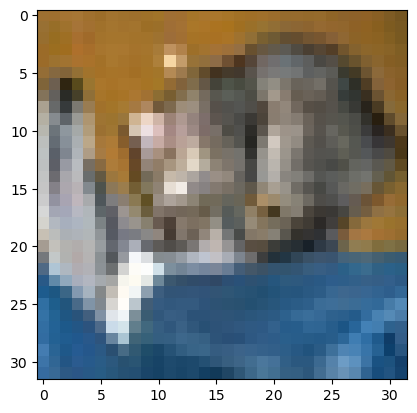

In [4]:
plt.imshow(image)

In [2]:
topdown = False

In [3]:
import importlib

In [11]:
importlib.reload(L)
importlib.reload(CNN)

<module 'models.CNN.model' from '/Users/genevievelarosedebilly/Desktop/Winter25/COMP396/HebbianTopDown/models/CNN/model.py'>

In [5]:
with open("ConfigsCNN/config0.json", "r") as file:
        config = json.load(file)

In [12]:
mymodelCNN = CNN.new_CNN_Model_from_config((3,32,32), config, 'cpu', 10)

mymodelCNN = CNNexp.new_CNN_Experiment(epoch=1, mymodel=mymodelCNN, dataloader=train_dataloader,
                                                nclasses=10, imgtype=CNN.ImageType.RGB, 
                                                device=torch.device('cpu'), greedytrain=True)
    
accuracy = CNNexp.CNN_Baseline_test(mymodel=mymodelCNN, data_loader=test_dataloader, imgtype=CNN.ImageType.RGB, topdown=False)[0]
print(accuracy)


  0%|          | 0/12500 [00:00<?, ?it/s]

TypeError: mexican_hat() got an unexpected keyword argument 'k'

In [ ]:
# greedy train -> the first 12 configs are for greedy training
print("GREEDY TRAINING:")

with open(f"ConfigsCNN/config0.json", "r") as file:
    config = json.load(file)

mymodelCNN = CNN.new_CNN_Model_from_config((3,32,32), config, 'cpu', 10)
mymodelCNN, mymodel = CNNexp.new_CNN_Experiment(epoch=1, mymodel=mymodelCNN, dataloader=train_dataloader,
                                                nclasses=10, imgtype=CNN.ImageType.RGB, 
                                                device=torch.device('cpu'), greedytrain=True)
    
accuracy = CNNexp.CNN_Baseline_test(mymodel=mymodel, data_loader=test_dataloader, imgtype=CNN.ImageType.RGB, topdown=topdown)[0]

mean_acc = np.mean(accuracy)
var_acc = np.var(accuracy)


In [ ]:
u1, o1 = mymodelCNN.layers['CNNLayer1'].forward(input1, label, False)
u2, o2 = mymodelCNN.layers['CNNLayer2'].forward(o1, None, False)
u3, o3 = mymodelCNN.layers['CNNLayer3'].forward(o2, None, False)

In [ ]:
view(o1)

In [ ]:
view(o2)

In [ ]:
view(o3)

### Gradient Classifier Head

In [135]:
with open("modelconfig.json", "r") as file:
        config = json.load(file)

In [ ]:
mymodelCNN = CNN.CNN_Model_from_config((3,32,32), config, LearningRule.SoftHebb, WeightScale.No, LearningRule.SoftHebb, Inhibition.Softmax, 'cpu', 10)
mymodelCNN, mymodel = CNN.CNN_Experiment(epoch=1, mymodel=mymodelCNN, dataloader=train_dataloader, testloader= test_dataloader,
                                         dataset='CIFAR10',
                                      nclasses=10, imgtype=CNN.ImageType.RGB, traintopdown=topdown, testtopdown=topdown, device=torch.device('cpu'), greedytrain=True)
# print(CNN.CNN_Baseline_test(mymodel=mymodelCNN, data_loader=test_dataloader, imgtype=CNN.ImageType.RGB,
#                                 topdown=topdown))

In [ ]:
print(CNN.CNN_Baseline_test(mymodel=mymodel, data_loader=test_dataloader, imgtype=CNN.ImageType.RGB,
                                topdown=topdown))

In [157]:
u1, o1 = mymodelCNN.layers['CNNLayer1'].forward(input1, label, False)
u2, o2 = mymodelCNN.layers['CNNLayer2'].forward(o1, None, False)
u3, o3 = mymodelCNN.layers['CNNLayer3'].forward(o2, None, False)

In [ ]:
view(o1)

In [ ]:
view(o2)

In [ ]:
view(o3)

### Hebbian Head

In [187]:
myHebbmodel = CNN.Hebbian_Classifier(8192, 10, 'cpu', mymodelCNN, 0.005)

In [ ]:
for _ in range(50):
    for data in tqdm(test_dataloader):
        inputs, label = data
        myHebbmodel.train_classifier(inputs, oneHotEncode(label, 10, 'cpu'))

In [189]:
print(CNN.CNN_Baseline_test(mymodel=myHebbmodel, data_loader=test_dataloader, imgtype=CNN.ImageType.RGB,
                                topdown=topdown))

  0%|          | 0/10000 [00:00<?, ?it/s]

(0.2927, {3: (22, 1000, 51), 6: (526, 1000, 1643), 8: (474, 1000, 825), 0: (570, 1000, 1467), 1: (245, 1000, 447), 4: (330, 1000, 1227), 5: (305, 1000, 600), 9: (322, 1000, 623), 7: (131, 1000, 188), 2: (2, 1000, 2)})


### Gradient 64 - 256 - 1024 channels

In [215]:
with open("fourconfig.json", "r") as file:
        config = json.load(file)

In [ ]:
mymodelCNN = CNN.CNN_Model_from_config((3,32,32), config, LearningRule.SoftHebb, WeightScale.No, LearningRule.SoftHebb, Inhibition.Softmax, 'cpu', 10)
mymodelCNN, mymodel = CNN.CNN_Experiment(epoch=1, mymodel=mymodelCNN, dataloader=train_dataloader, testloader= test_dataloader,
                                         dataset='CIFAR10',
                                      nclasses=10, imgtype=CNN.ImageType.RGB, traintopdown=topdown, testtopdown=topdown, device=torch.device('cpu'), greedytrain=True)
# print(CNN.CNN_Baseline_test(mymodel=mymodel, data_loader=test_dataloader, imgtype=CNN.ImageType.RGB,
#                                 topdown=topdown))

#### 4 layers

In [ ]:
print(CNN.CNN_Baseline_test(mymodel=mymodel, data_loader=test_dataloader, imgtype=CNN.ImageType.RGB,
                                topdown=topdown))

In [ ]:
u1, o1 = mymodelCNN.layers['CNNLayer1'].forward(input1, label, False)
u2, o2 = mymodelCNN.layers['CNNLayer2'].forward(o1, None, False)
u3, o3 = mymodelCNN.layers['CNNLayer3'].forward(o2, None, False)
u4, o4 = mymodelCNN.layers['CNNLayer4'].forward(o3, None, False)

In [ ]:
view(o1)
view(o2)
view(o3)
view(o4)

#### 2 layers

In [ ]:
print(CNN.CNN_Baseline_test(mymodel=mymodel, data_loader=test_dataloader, imgtype=CNN.ImageType.RGB,
                                topdown=topdown))

In [203]:
u1, o1 = mymodelCNN.layers['CNNLayer1'].forward(input1, label, False)
u2, o2 = mymodelCNN.layers['CNNLayer2'].forward(o1, None, False)

In [ ]:
view(o1)
view(o2)

#### 3 layers

In [ ]:
print(CNN.CNN_Baseline_test(mymodel=mymodel, data_loader=test_dataloader, imgtype=CNN.ImageType.RGB,
                                topdown=topdown))

In [194]:
u1, o1 = mymodelCNN.layers['CNNLayer1'].forward(input1, label, False)
u2, o2 = mymodelCNN.layers['CNNLayer2'].forward(o1, None, False)
u3, o3 = mymodelCNN.layers['CNNLayer3'].forward(o2, None, False)

In [ ]:
view(o1)
view(o2)
view(o3)